In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as st
import seaborn
from scipy.optimize import approx_fprime, minimize, line_search

# Метод максимального правдоподобия


In [ ]:
n=1000

Lambda=0.2
x=st.expon.rvs(size=n, scale =1 /Lambda)

Аналитически ML оценка имеет вид  
Тут можно юзать свойство ML оценок от функций от оценок  
(или дельта метод?)


In [ ]:

Lambda_ml = 1/np.mean(x)
Lambda_ml

Численно можно запрогать 

In [ ]:
def lnL(Lambda,x,scale=1):
    # Считаем плотность для каждого наблюдения
    f_x=st.expon.pdf(x,scale = 1/Lambda) 
    
    lnL_value = np.log(f_x)
    
    return sum(lnL_value) *scale

In [ ]:

print('lnL(Lambda,x) = ',lnL(Lambda,x)) 
print('lnL(Lambda_ml,x) = ',lnL(Lambda_ml,x)) 


Поскольку нам нужно максимизировать функ максимального правдоподобия,   
то будем домножать ее на -1,   
тем самым переворачивая значения и получая задачу минимизации

Функция minimize автоматически будет минимизировать по первому параметру функции fun то есть по Lambda

In [ ]:
lnL_opt = minimize(fun=lnL, x0=0.1,args=(x,-1),method='BFGS')

In [ ]:
#Видим, что численно для максимума получили тот же резульат
#как и в теории 

print(-1*lnL_opt.fun)
print(lnL_opt.x)

# Информация Фишера и асимптотич дисперсия

Информация Фишера для экспоненциального распределения известна  
и равна $\frac{n}{\lambda^2}$  


Поскольку Ml оценка остсоятельна, несмещена, эффективна, то
* $ \frac{1}{I(\theta)} = Var(\hat{\theta})$ - следствие из эффективности (в остальных случаях тут нер-во влево)
* $I(\theta) = g(\theta)$ по дельта методу имеем, что $I(\hat{\theta}) \rightarrow I(\theta)$ и 
* $I(\hat{\theta}) \sim N(I(\hat{\theta}), I'(\theta)^2 Var(\theta)  )$ 
 


Асимптотич дисперсия ml оценки параметра экспоненциального распределения 1/I

In [ ]:
I=n/Lambda**2
Lambda_ml_var=1/I

# Асимптотическая нормальность        ML оценок

In [ ]:
m = 10000 
Lambda_ml_vec = [1/np.mean(st.expon.rvs(size=n,scale = 1/Lambda)) for i in range(m) ]
mu=Lambda     #оценка несмещена
sigma=np.sqrt(Lambda_ml_var)      #= sqrt(1/I)

print(mu)
print(sigma)


In [ ]:
t=np.linspace(st.norm.ppf(0.01, loc=mu,scale=sigma), st.norm.ppf(0.99, loc=mu,scale=sigma), num = 1000)
            
plt.plot(t,st.norm.pdf(t, loc=mu,scale=sigma), label ='Normal pdf')
plt.xlabel('x')
plt.ylabel('y')

seaborn.histplot(Lambda_ml_vec, stat='density', label='ML est hist')

plt.legend()

стоит заметить, что при малой выборке экспон распределения (n=10)  
Распределение ml оценки его параметра не похоже на нормальное  
Это свойство гарантируется только в асимптотике


# Асимптотическая нормальность функций от ML оценок

In [ ]:
# Рассмотрим распределение оценки информации
# Фишера, обратив внимание, что она является
# функцией от ММП оценки параметра 'lambda'.
# Следовательно, асимптотическое распределеине
# оценки информации Фишера будет нормальным со
# следующими, получаеыми по дельта методу
# параметрами:


In [ ]:
# асимптотическое математическое ожидание
I_mean = I          

Lambda_var = 1 / I

# асимптотическая дисперсия
I_var = Lambda_var * (2 * n / (Lambda ** 3)) ** 2    

 
 # и ее ММП оценка
I_var_est = Lambda_ml_var * (2 * n /                  
                              (Lambda_ml_var ** 3)) ** 2


In [ ]:
I_est_vec  = [n*np.mean(st.expon.rvs(size=n,scale=1/Lambda))**2 for i in range(m) ]
print(np.mean(I_est_vec))
print(I)


In [ ]:
t=np.linspace(st.norm.ppf(0.01,loc = I_mean, scale =np.sqrt(I_var) )   ,
             st.norm.ppf(0.99,loc = I_mean, scale =np.sqrt(I_var) )   ,
             1000
             )

fig, ax = plt.subplots()

ax.plot(t, st.norm.pdf(t, loc = I_mean, scale =np.sqrt(I_var)), label='Theoretical dist of I est')
seaborn.histplot(I_est_vec, stat='density', label='I ml est hist')
ax.legend()
plt.plot()

# Задания 

In [ ]:
# 1. По выборке из экспоненциального распределения
#    с параметром 'lambda = 0.3' при объемах выборки
#    n равных 10, 20, 50, 100 и 1000 сравните, как
#    соотносятся:
#    1)     Истинное значение параметра и его ММП оценка
#    2)     Истинное значение асимптотической дисперсии
#           ММП оценки и ее (этой дисперсии) ММП оценка
#    3)     Асимптотическая вероятность того, что
#           параметр отклонится от истинного значения
#           более, чем на 2%, и ММП оценка этой вероятности
#    4*)    Сравните полученные в предыдущем пункте
#           значения с как можно более точной, то есть
#           полученной по очень большой выборке из ММП
#           оценок, оценкой истинной вероятности того, что
#           ММП оценка отклонится от истинного значения
#           оцениваемого параметра более, чем на 2%
#    5)     График функции плотности асимптотического распределения
#           ММП оценки и его оценка
#    6*)    Повторите предыдущие пункты для ММП оценки
#           асимптотической дисперсии ММП оценки параметра 'lambda'
#    7**)   Повторите предыдущие пункты для ММП оценки вероятности
#           из пункта 3)
#    8)     Повторите предыдущие пункты для распределения
#           Пуассона с параметром 'lambda = 5'

## Задание 1 



In [2]:
Lambda = 0.3

n=np.array([10,20,50,100,1000,10000])



x=np.array([st.expon.rvs(size=i, scale=1/Lambda) for i in n])
Lambda_ml = np.array([1/ np.mean(i) for i in x])

C:\Users\dbesp\AppData\Local\Temp/ipykernel_13340/3736437503.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x=np.array([st.expon.rvs(size=i, scale=1/Lambda) for i in n])


[]

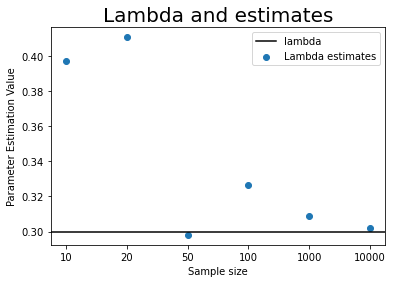

In [3]:
t=[0,1,2,3,4,5]

fig,ax =plt.subplots()
ax.axhline(y = Lambda , linestyle='-',                  # истинное значение оцениваемого
            color='black', label = "lambda")              # параметра theta


plt.xticks(t, [str(i) for i in n])
ax.scatter(t,Lambda_ml,label='Lambda estimates')
ax.set_xlabel('Sample size')
ax.set_ylabel('Parameter Estimation Value')
ax.set_title('Lambda and estimates', fontsize=20)
ax.legend()
ax.plot()

## Задание 2

In [4]:
# 1. По выборке из экспоненциального распределения
#    с параметром 'lambda = 0.3' при объемах выборки
#    n равных 10, 20, 50, 100 и 1000 сравните, как
#    соотносятся:

#    2)     Истинное значение асимптотической дисперсии
#           ММП оценки и ее (этой дисперсии) ММП оценка

In [5]:

I=n/Lambda**2
#Истинное значение асимптотической дисперсии
#           ММП оценки
Var_Lambda_est=1/I


ММП оценка асимптотической дисперсии ММП оценки

$$\hat{as.var(\hat{\lambda}_{ML})_{ML}}  = \hat{\frac{1}{I(\lambda)}_{ML}} = \frac{1}{I(\hat{\lambda_{ML}})}   $$


In [6]:
As_var_ml = Lambda_ml**2 /n


[]

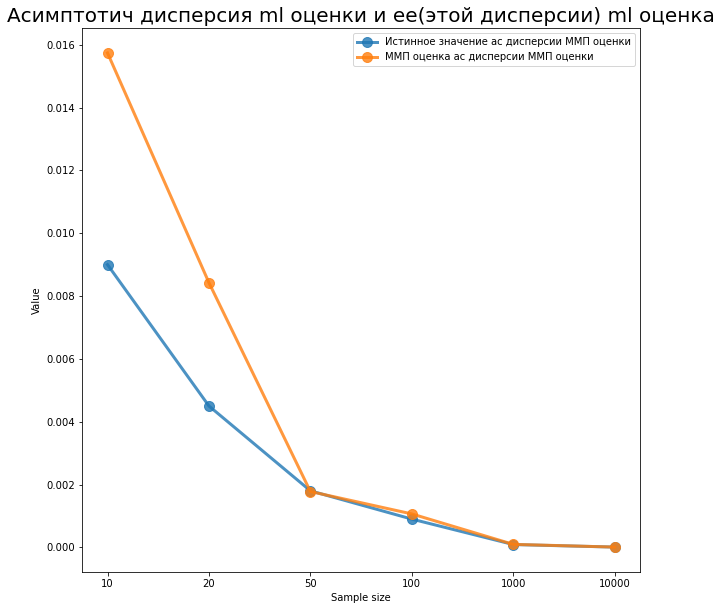

In [7]:
t=[0,1,2,3,4,5]

fig,ax =plt.subplots()

fig.set_size_inches(10,10)

plt.xticks(t, [str(i) for i in n])
ax.plot(t,Var_Lambda_est,label='Истинное значение ас дисперсии ММП оценки',
          linewidth  =3, alpha =0.8, marker = 'o',markersize=10
          )
ax.plot(t,As_var_ml,label='ММП оценка ас дисперсии ММП оценки',
          linewidth  =3, alpha =0.8, marker = 'o',markersize=10 )
ax.set_xlabel('Sample size')
ax.set_ylabel('Value')
ax.set_title('Асимптотич дисперсия ml оценки и ее(этой дисперсии) ml оценка', fontsize=20)
ax.legend()
ax.plot()

In [89]:
# 1. По выборке из экспоненциального распределения
#    с параметром 'lambda = 0.3' при объемах выборки
#    n равных 10, 20, 50, 100 и 1000 сравните, как
#    соотносятся:

#    3)     Асимптотическая вероятность того, что
#           параметр отклонится от истинного значения
#           более, чем на 2%, и ММП оценка этой вероятности

поскольку ML оценки асимптотически нормальны, то
 

$$ P \left\{ 100\left|\frac{\hat{\lambda_{ML} } } {\lambda} \right| >102    \right\} = 1 - P \left\{-1.02 \lambda < \hat{\lambda_{ML} } <1.02 \lambda    \right\} = 1 - P \left\{\frac{-1.02 \lambda}{\sqrt{as.var(\hat{\lambda_{ML} })}} < N(0,1) < \frac{ 1.02\lambda}{\sqrt{as.var(\hat{\lambda_{ML} })}}    \right\}  $$

In [22]:
1 - (st.norm.cdf(1.02*Lambda / np.sqrt(Var_Lambda_est),  
            loc = 0, scale = 1) - st.norm.cdf(-1.02*Lambda / np.sqrt(Var_Lambda_est), 
                                              loc = 0, scale = 1))

array([1.25742638e-03, 5.07704457e-06, 5.49338353e-13, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

Видим, что истинная асимптотическая вероятность отклониться от параметра на 2 процента очень мала и уменьшается с ростом числа наблюдений  

Чтобы посчитать оценку, давайте посмотрим на долю наблюдений, в которых такое отклонение произошло

In [16]:
np.zeros(len(n))

array([0., 0., 0., 0., 0., 0.])

In [29]:
m= 1000

cnt=np.zeros(len(n))
for k in range(m):
    x=np.array([st.expon.rvs(size=i, scale=1/Lambda) for i in n])
    Lambda_ml = np.array([1/ np.mean(i) for i in x])
   
    for i in range(len(n)):
        if np.abs(Lambda_ml[i]/ Lambda)>1.02:
            cnt[i]=cnt[i]+1

print(cnt/m)

C:\Users\dbesp\AppData\Local\Temp/ipykernel_13340/284891498.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x=np.array([st.expon.rvs(size=i, scale=1/Lambda) for i in n])


[0.514 0.514 0.488 0.423 0.284 0.023]


Видим, что оценка вероятности также уменьшается с ростом числа наблюдений